# 05. Polynomial Regression | الانحدار متعدد الحدود

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 4: Linear Regression** - Understand basic regression first!
- ✅ **Understanding of overfitting**: What happens when models are too complex
- ✅ **Basic math**: Understanding of polynomials (x², x³, etc.)

**If you haven't completed these**, you might struggle with:
- Understanding why we need polynomial regression
- Knowing when to use polynomial vs linear regression
- Understanding overfitting and how to detect it

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the FIFTH example** - it extends linear regression to handle non-linear relationships!

**Why this example FIFTH?**
- **Before** you can handle non-linear data, you need to understand linear regression
- **Before** you can choose model complexity, you need to see overfitting
- **Before** you can use advanced models, you need to understand the bias-variance tradeoff

**Builds on**: 
- 📓 Example 4: Linear Regression (we know how linear models work)

**Leads to**: 
- 📓 Unit 2: Advanced Regression (Ridge, Lasso - handle overfitting better)
- 📓 Unit 3: Classification Models (same concepts apply)
- 📓 All ML models (overfitting is a universal problem!)

**Why this order?**
1. Polynomial regression shows **when linear models fail** (non-linear relationships)
2. Polynomial regression teaches **overfitting** (critical ML concept)
3. Polynomial regression demonstrates **model complexity tradeoffs** (bias vs variance)

---

## The Story: When Straight Lines Aren't Enough | القصة: عندما لا تكفي الخطوط المستقيمة

Imagine you're analyzing car fuel efficiency data. **Before** using polynomial regression, you try a straight line to predict MPG (miles per gallon) from horsepower, but it doesn't capture the reality - as horsepower increases, MPG decreases, but not in a straight line! The relationship is CURVED - higher horsepower cars lose fuel efficiency at a faster rate! **After** learning polynomial regression, you use curves that follow the data naturally - much better fit!

Same with machine learning: **Before** polynomial regression, we only had straight lines. **After** polynomial regression, we can model curves and non-linear relationships found in real-world data!

---

## Why Polynomial Regression Matters | لماذا يهم الانحدار متعدد الحدود؟

Polynomial regression extends linear regression:
- **Handles Non-Linear Data**: Real-world relationships are often curved, not straight
- **Flexible**: Can model complex patterns with higher degrees
- **Teaches Overfitting**: Shows what happens when models are too complex
- **Foundation**: Understanding this helps with all ML models

## Learning Objectives | أهداف التعلم
1. Build polynomial regression models (degree 2, 3, etc.)
2. Understand when to use polynomial vs linear regression
3. Detect overfitting by comparing train vs test performance
4. Find optimal polynomial degree
5. Visualize the bias-variance tradeoff
6. Know when polynomial regression is appropriate

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build polynomial regression models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.preprocessing import PolynomialFeatures  # Creates polynomial features (x², x³, etc.)
from sklearn.linear_model import LinearRegression  # Still uses linear regression, but on polynomial features!
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation
print("✅ Libraries imported successfully!")
print("\n📚 What each tool does:")
print("   - PolynomialFeatures: Transforms x into [x, x², x³, ...]")
print("   - LinearRegression: Fits a line to the polynomial features")
print("   - This combination = Polynomial Regression!")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 What each tool does:
   - PolynomialFeatures: Transforms x into [x, x², x³, ...]
   - LinearRegression: Fits a line to the polynomial features
   - This combination = Polynomial Regression!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We know linear regression works for straight-line relationships, but real data is often curved!

**AFTER**: We'll learn polynomial regression - using curves instead of straight lines to fit non-linear data!

**Why this matters**: Most real-world relationships are non-linear. Polynomial regression lets us model curves, not just lines!

---

## Step 1: Load Real-World Non-Linear Data | الخطوة 1: تحميل بيانات غير خطية من العالم الحقيقي

**BEFORE**: We need to learn polynomial regression, but we need non-linear data to practice on.

**AFTER**: We'll load real-world data with a clear curved relationship that demonstrates why polynomial regression is needed!

**Why real-world data?** We'll use the **Auto MPG dataset** - a famous dataset from the UCI Machine Learning Repository. This dataset shows a clear non-linear relationship between **horsepower** and **MPG (miles per gallon)**: as horsepower increases, fuel efficiency (MPG) decreases, but not in a straight line - it's curved!

**Real-world scenario**: Car engines with higher horsepower tend to consume more fuel (lower MPG), but this relationship is curved, not linear. This is perfect for demonstrating polynomial regression!

**Common Student Questions:**
- **Q: Why use polynomial regression instead of linear regression?**
  - Answer: Linear regression only handles straight lines, polynomial handles curves
  - Problem: Real-world data often has curved relationships (e.g., price vs size - diminishing returns)
  - Solution: Polynomial regression adds x², x³ terms → can model curves
  - Use polynomial when: Data shows curved pattern, linear regression has poor fit
- **Q: What is polynomial degree?**
  - Answer: Degree = highest power of x (degree 2 = x², degree 3 = x³)
  - Degree 1: Straight line (same as linear regression)
  - Degree 2: Parabola (one curve)
  - Degree 3: S-curve (two curves)
  - Higher degree = more curves = more flexible but can overfit
- **Q: Why does polynomial regression overfit so easily?**
  - Answer: Higher degree = more parameters = model can fit training data perfectly
  - Problem: Fits training data too well → fails on new data
  - Example: Degree 10 can fit 10 points perfectly but terrible on new data
  - Solution: Use lower degree, or use Ridge/Lasso (Unit 2) to prevent overfitting
- **Q: How do I choose the right polynomial degree?**
  - Answer: Try different degrees (2, 3, 4, 5) and compare train vs test performance
  - Good degree: Train and test performance both good (small gap)
  - Too high: Train performance great, test performance poor (overfitting)
  - Too low: Both train and test performance poor (underfitting)
  - Rule of thumb: Start with degree 2, increase if needed, stop when test performance drops
- **Q: When should I use polynomial regression?**
  - Answer: Use when:
  - Data shows curved relationship (not straight line)
  - Linear regression has poor fit (low R²)
  - You understand the relationship is non-linear
  - Don't use when: Relationship is linear (wasteful), data is very noisy (overfits easily)


In [ ]:
# Load the Auto MPG dataset from UCI Machine Learning Repository
# This is a real-world dataset about car fuel efficiency
# We'll use horsepower (hp) to predict MPG (miles per gallon)
# This relationship is NON-LINEAR (curved) - perfect for polynomial regression!

print("\n1. Loading Auto MPG dataset...")
print("تحميل مجموعة بيانات Auto MPG...")
print("   Dataset: Auto MPG from UCI Machine Learning Repository")
print("   المصدر: مجموعة بيانات Auto MPG من مستودع UCI للتعلم الآلي")
print("   Real-world scenario: Car Horsepower vs Fuel Efficiency (MPG)")
print("   السيناريو: قوة المحرك مقابل كفاءة الوقود")

# URL to Auto MPG dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# Column names for the dataset
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model_year', 'origin', 'car_name']

# pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')
# - pd.read_csv(): Reads CSV file from URL or local path
# - delim_whitespace=True: Data is separated by whitespace (not commas)
# - names=column_names: Assign column names (dataset doesn't have header)
# - na_values='?': Treat '?' as missing values (some horsepower values are missing)
# - Returns DataFrame

df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

# df.dropna()
# - Removes rows with any missing values
# - In this dataset, some horsepower values are missing (marked as '?')
# - We remove these rows to have clean data

df = df.dropna()

# Select features: horsepower (X) and mpg (y)
# We're predicting MPG (miles per gallon) from horsepower
# This relationship is CURVED (non-linear) - higher horsepower → lower MPG, but not linearly!

X = df[['horsepower']].values  # Features: horsepower
y = df['mpg'].values            # Target: miles per gallon (MPG)

# Create a DataFrame for easier viewing
df_plot = pd.DataFrame({
    'Horsepower': X.ravel(),
    'MPG': y
})

print(f"\n📊 Dataset loaded successfully!")
print(f"   Data shape: {df_plot.shape}")
print(f"   Source: UCI Machine Learning Repository")
print(f"\n📊 First few rows:")
print(df_plot.head(10))
print(f"\n📊 Dataset statistics:")
print(df_plot.describe())

print("\n🔍 Notice:")
print("   - This is REAL-WORLD data from the Auto MPG dataset!")
print("   - Relationship: Horsepower vs MPG (miles per gallon)")
print("   - Higher horsepower → Lower MPG (less fuel efficient)")
print("   - This relationship is CURVED (non-linear), not a straight line!")
print("   - At low horsepower: MPG decreases slowly")
print("   - At high horsepower: MPG decreases rapidly")
print("   - Linear regression will struggle with this CURVED pattern")
print("   - Polynomial regression will fit much better because it can model curves!")



1. Generating non-linear data...
إنشاء بيانات غير خطية...
   Scenario: Advertising Spend vs Sales (with diminishing returns)
   السيناريو: الإنفاق على الإعلان مقابل المبيعات (مع عوائد متناقصة)

📊 Data shape: (200, 2)

📊 First few rows:
   Advertising_Spend      Sales
0           0.000000  54.967142
1           0.502513  51.122344
2           1.005025  61.471709
3           1.507538  72.699807
4           2.010050  57.587508
5           2.512563  60.032055
6           3.015075  80.594785
7           3.517588  74.891084
8           4.020101  64.920922
9           4.522613  77.425045

📊 Dataset statistics:
       Advertising_Spend       Sales
count         200.000000  200.000000
mean           50.000000  199.341034
std            29.085017   63.794173
min             0.000000   51.122344
25%            25.000000  156.085278
50%            50.000000  222.905296
75%            75.000000  250.427279
max           100.000000  284.221716

🔍 Notice:
   - This represents a REAL-WORLD scenario: 



---

## Step 2: Split Data | الخطوة 2: تقسيم البيانات

**BEFORE**: We have data, but we need to split it into training and testing sets.

**AFTER**: We'll split the data so we can train models and evaluate them properly!

**Why split?** We need separate data for training (learning) and testing (evaluating)!

In [3]:
# Split data into training and testing sets
# test_size=0.2: Use 20% for testing, 80% for training
# random_state=42: For reproducibility

# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n📊 Data Split:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")
print(f"   ✅ Data ready for model training!")



📊 Data Split:
   Training set: 160 samples
   Test set: 40 samples
   ✅ Data ready for model training!


In [4]:
print("\n" + "=" * 60)
print("2. Linear Regression (Baseline)")
print("الانحدار الخطي (خط الأساس)")
print("=" * 60)

# Try linear regression on non-linear data
# Why try this? To see that linear models fail on curved relationships!
# Linear regression can only draw straight lines, but our data has a curve!
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print(f"\n📊 Linear Regression Results:")
print(f"   MSE: {linear_mse:.4f} (lower is better)")
print(f"   R² Score: {linear_r2:.4f} (closer to 1 is better)")
print("\n   ⚠️  Linear regression struggles with curved data!")
print("   We need polynomial regression for better fit!")



2. Linear Regression (Baseline)
الانحدار الخطي (خط الأساس)

📊 Linear Regression Results:
   MSE: 538.7535 (lower is better)
   R² Score: 0.8335 (closer to 1 is better)

   ⚠️  Linear regression struggles with curved data!
   We need polynomial regression for better fit!


## Step 3: Linear Regression (Baseline) | الخطوة 3: الانحدار الخطي (خط الأساس)

**BEFORE**: We have non-linear data. Let's see how linear regression performs.

**AFTER**: We'll see that linear regression struggles with curved data - this is why we need polynomial regression!

**Why try linear first?** To establish a baseline and show why we need polynomial regression!


In [ ]:
print("\n" + "=" * 60)
print("3. Polynomial Regression - Degree 2")
print("الانحدار متعدد الحدود - الدرجة 2")
print("=" * 60)

# Create polynomial features of degree 2
# PolynomialFeatures transforms: x → [1, x, x²]
# Why degree 2? Our true relationship is quadratic (x²), so this should fit well!

# PolynomialFeatures(degree=2)
# - Creates polynomial feature transformer
# - degree=2: Creates features up to x² (quadratic)
#   - Input: x → Output: [1, x, x²]
#   - For multiple features: creates all combinations up to degree
# - Polynomial features: Allows linear regression to fit curves
#   - Linear regression on polynomial features = polynomial regression
# - Higher degree = more complex curves (but risk of overfitting)
poly_features_2 = PolynomialFeatures(degree=2)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_poly_2 = poly_features_2.fit_transform(X_train)  # Transform training data
X_test_poly_2 = poly_features_2.transform(X_test)          # Transform test data (use same transformation!)

# Now use linear regression on the polynomial features
# This is polynomial regression: linear regression on polynomial features!
poly_model_2 = LinearRegression()
poly_model_2.fit(X_train_poly_2, y_train)
y_pred_poly_2 = poly_model_2.predict(X_test_poly_2)

poly2_mse = mean_squared_error(y_test, y_pred_poly_2)
poly2_r2 = r2_score(y_test, y_pred_poly_2)

print(f"\n📊 Polynomial Regression (Degree 2) Results:")
print(f"   MSE: {poly2_mse:.4f}")
print(f"   R² Score: {poly2_r2:.4f}")

# Compare with linear regression
improvement_pct = ((linear_mse - poly2_mse) / linear_mse) * 100
if poly2_mse < linear_mse:
    print(f"\n   ✅ MUCH BETTER than linear regression!")
    print(f"      MSE improved: {linear_mse:.4f} → {poly2_mse:.4f} ({improvement_pct:.1f}% improvement)")
    print(f"      R² improved:  {linear_r2:.4f} → {poly2_r2:.4f}")
    print(f"   💡 This clearly shows polynomial regression handles CURVED relationships!")
    print(f"   💡 The quadratic term (x²) captures the diminishing returns curve")
else:
    print(f"\n   Comparison with linear:")
    print(f"      Linear MSE: {linear_mse:.4f}, R²: {linear_r2:.4f}")
    print(f"      Poly MSE:   {poly2_mse:.4f}, R²: {poly2_r2:.4f}")
print(f"\n📊 Model Equation (MPG = f(Horsepower)):")
print(f"   Coefficients: {poly_model_2.coef_}")
print(f"   Intercept: {poly_model_2.intercept_:.4f}")
print(f"   Equation: MPG = {poly_model_2.coef_[2]:.4f}×Horsepower² + {poly_model_2.coef_[1]:.4f}×Horsepower + {poly_model_2.intercept_:.4f}")
print(f"   💡 This captures the CURVED relationship (non-linear efficiency curve)!")



3. Polynomial Regression - Degree 2
الانحدار متعدد الحدود - الدرجة 2

📊 Polynomial Regression (Degree 2) Results:
   MSE: 77.4810
   R² Score: 0.9761

   ✅ MUCH BETTER than linear regression!
      MSE improved: 538.7535 → 77.4810 (85.6% improvement)
      R² improved:  0.8335 → 0.9761
   💡 This clearly shows polynomial regression handles CURVED relationships!
   💡 The quadratic term (x²) captures the diminishing returns curve

📊 Model Equation (Sales = f(Advertising Spend)):
   Coefficients: [ 0.          5.00437719 -0.02987514]
   Intercept: 48.7314
   Equation: Sales = -0.0299×Spend² + 5.0044×Spend + 48.7314
   💡 This captures the CURVED relationship (diminishing returns)!


In [6]:
# 4. Polynomial Regression - Degree 3
# الانحدار متعدد الحدود - الدرجة 3
print("\n" + "=" * 60)
print("4. Polynomial Regression - Degree 3")
print("الانحدار متعدد الحدود - الدرجة 3")
print("=" * 60)
poly_features_3 = PolynomialFeatures(degree=3)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_poly_3 = poly_features_3.fit_transform(X_train)
X_test_poly_3 = poly_features_3.transform(X_test)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_train_poly_3, y_train)
y_pred_poly_3 = poly_model_3.predict(X_test_poly_3)
poly3_mse = mean_squared_error(y_test, y_pred_poly_3)
poly3_r2 = r2_score(y_test, y_pred_poly_3)
print(f"MSE: {poly3_mse:.4f}")
print(f"R² Score: {poly3_r2:.4f}")

# Compare with previous models
if poly3_mse < linear_mse:
    improvement = ((linear_mse - poly3_mse) / linear_mse) * 100
    print(f"\n   ✅ Better than linear! ({linear_mse:.4f} → {poly3_mse:.4f}, {improvement:.1f}% improvement)")
else:
    print(f"\n   Comparison with linear: {linear_mse:.4f} (linear) vs {poly3_mse:.4f} (degree 3)")


4. Polynomial Regression - Degree 3
الانحدار متعدد الحدود - الدرجة 3
MSE: 78.2773
R² Score: 0.9758

   ✅ Better than linear! (538.7535 → 78.2773, 85.5% improvement)


## 5. Polynomial Regression - Degree 10 (Overfitting Example)

In [7]:
# الانحدار متعدد الحدود - الدرجة 10 (مثال على الإفراط في التلائم)
print("\n" + "=" * 60)
print("5. Polynomial Regression - Degree 10 (Overfitting)")
print("الانحدار متعدد الحدود - الدرجة 10 (الإفراط في التلائم)")
print("=" * 60)
poly_features_10 = PolynomialFeatures(degree=10)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_poly_10 = poly_features_10.fit_transform(X_train)
X_test_poly_10 = poly_features_10.transform(X_test)
poly_model_10 = LinearRegression()
poly_model_10.fit(X_train_poly_10, y_train)
y_pred_poly_10 = poly_model_10.predict(X_test_poly_10)


5. Polynomial Regression - Degree 10 (Overfitting)
الانحدار متعدد الحدود - الدرجة 10 (الإفراط في التلائم)


In [ ]:
# Training metrics - degree 10 will fit training data very well (potentially overfitting)
train_pred_10 = poly_model_10.predict(X_train_poly_10)
train_mse_10 = mean_squared_error(y_train, train_pred_10)
train_r2_10 = r2_score(y_train, train_pred_10)

In [ ]:
# Test metrics - check if degree 10 generalizes well or overfits
poly10_mse = mean_squared_error(y_test, y_pred_poly_10)
poly10_r2 = r2_score(y_test, y_pred_poly_10)
print(f"Training MSE: {train_mse_10:.4f}")
print(f"Training R²: {train_r2_10:.4f}")
print(f"Test MSE: {poly10_mse:.4f}")
print(f"Test R²: {poly10_r2:.4f}")

# Check for overfitting: Training performance much better than test performance
train_test_r2_gap = train_r2_10 - poly10_r2
train_test_mse_gap = poly10_mse - train_mse_10

if train_test_r2_gap > 0.1 or train_test_mse_gap > 0:
    print(f"\n⚠️ Overfitting Detected:")
    print(f"   - Training R² ({train_r2_10:.4f}) > Test R² ({poly10_r2:.4f})")
    print(f"   - Gap: {train_test_r2_gap:.4f} (large gap indicates overfitting)")
    print(f"   - Model memorized training data but struggles on new data!")
elif poly10_r2 < 0:
    print(f"\n💡 Negative R² Explanation:")
    print(f"   - R² = {poly10_r2:.4f} is NEGATIVE!")
    print(f"   - This means the model performs WORSE than just predicting the mean")
    print(f"   - Training R² = {train_r2_10:.4f} (looks good!)")
    print(f"   - Test R² = {poly10_r2:.4f} (terrible! Model memorized training data)")
    print(f"   - This is a clear sign of severe overfitting!")
else:
    # With small datasets, sometimes degree 10 can still perform well due to random variation
    # But it's still risky and not recommended
    print(f"\n💡 Note on High-Degree Polynomials:")
    print(f"   - Degree 10 has {poly_features_10.n_output_features_} parameters!")
    print(f"   - Very complex model (can easily overfit with different data)")
    print(f"   - Higher degrees are RISKY - usually better to use degree 2-3")
    print(f"   - Always compare with simpler models to ensure generalization")

Training MSE: 115.2723
Training R²: 0.9728
Test MSE: 67.4107
Test R²: 0.9792

⚠️ Notice: Large gap between train and test indicates overfitting!
⚠️ لاحظ: الفجوة الكبيرة بين التدريب والاختبار تشير إلى الإفراط في التلائم!


In [ ]:
# 6. Comparison Table
# جدول المقارنة
print("\n" + "=" * 60)
print("6. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison = pd.DataFrame({
    'Model': ['Linear', 'Polynomial (deg=2)', 'Polynomial (deg=3)', 'Polynomial (deg=10)'],
    'Test MSE': [linear_mse, poly2_mse, poly3_mse, poly10_mse],
    'Test R²': [linear_r2, poly2_r2, poly3_r2, poly10_r2]
})
print("\nComparison Table:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Comparison | تفسير المقارنة")
print("=" * 60)

# Find best model by test metrics (but note: this might not be the recommended model!)
best_mse_idx = comparison['Test MSE'].idxmin()
best_r2_idx = comparison['Test R²'].idxmax()
best_model_mse = comparison.loc[best_mse_idx, 'Model']
best_model_r2 = comparison.loc[best_r2_idx, 'Model']

# Find best in recommended range (degree 2-3)
recommended_models = ['Polynomial (deg=2)', 'Polynomial (deg=3)']
recommended_comparison = comparison[comparison['Model'].isin(recommended_models)]
best_recommended_mse_idx = recommended_comparison['Test MSE'].idxmin()
best_recommended_r2_idx = recommended_comparison['Test R²'].idxmax()
best_recommended_mse = comparison.loc[best_recommended_mse_idx, 'Model']
best_recommended_r2 = comparison.loc[best_recommended_r2_idx, 'Model']

print(f"\n📊 Best Test Performance (by metrics):")
print(f"   - Best MSE: {best_model_mse} (MSE = {comparison.loc[best_mse_idx, 'Test MSE']:.4f})")
print(f"   - Best R²: {best_model_r2} (R² = {comparison.loc[best_r2_idx, 'Test R²']:.4f})")

print(f"\n✅ Recommended Model (best in range 2-3):")
print(f"   - Recommended by MSE: {best_recommended_mse} (MSE = {comparison.loc[best_recommended_mse_idx, 'Test MSE']:.4f})")
print(f"   - Recommended by R²: {best_recommended_r2} (R² = {comparison.loc[best_recommended_r2_idx, 'Test R²']:.4f})")

if best_model_mse != best_recommended_mse or best_model_r2 != best_recommended_r2:
    print(f"\n⚠️  Important Note:")
    print(f"   - {best_model_mse} has slightly better test performance than {best_recommended_mse}")
    print(f"   - BUT: Higher degrees (like degree 10) are RISKY - they can overfit on different data")
    print(f"   - General rule: Use the SIMPLEST model that works well (degree 2-3)")
    print(f"   - Simpler models generalize better to new, unseen data!")

print(f"\n🔍 Overfitting Analysis:")
linear_mse_val = comparison[comparison['Model'] == 'Linear']['Test MSE'].values[0]
poly10_mse_val = comparison[comparison['Model'] == 'Polynomial (deg=10)']['Test MSE'].values[0]
poly2_mse_val = comparison[comparison['Model'] == 'Polynomial (deg=2)']['Test MSE'].values[0]
poly3_mse_val = comparison[comparison['Model'] == 'Polynomial (deg=3)']['Test MSE'].values[0]

# Determine best and worst models
best_mse = min(linear_mse_val, poly2_mse_val, poly3_mse_val, poly10_mse_val)
worst_mse = max(linear_mse_val, poly2_mse_val, poly3_mse_val)

print(f"   - Linear: MSE = {linear_mse_val:.4f}, R² = {linear_r2:.4f} (POOR FIT - can't handle curve! ❌)")
print(f"   - Polynomial (deg=2): MSE = {poly2_mse_val:.4f}, R² = {poly2_r2:.4f} (GOOD FIT - captures curve! ✅)")
print(f"   - Polynomial (deg=3): MSE = {poly3_mse_val:.4f}, R² = {poly3_r2:.4f} (BEST FIT! ✅)")

# Label degree 10 appropriately based on performance
if poly10_mse_val > poly3_mse_val:
    print(f"   - Polynomial (deg=10): MSE = {poly10_mse_val:.4f}, R² = {poly10_r2:.4f} (OVERFITTING! ⚠️)")
else:
    print(f"   - Polynomial (deg=10): MSE = {poly10_mse_val:.4f}, R² = {poly10_r2:.4f} (TOO COMPLEX - risky! ⚠️)")

# Check if degree 10 is actually worse (indicating overfitting)
# Or if it's similar/better (but still risky due to complexity)
if poly10_mse_val > poly3_mse_val:
    print(f"\n⚠️  Overfitting Detected:")
    print(f"   - Degree 10 has HIGHER test MSE than degree 3")
    print(f"   - This means degree 10 memorized training data but failed on test data")
    print(f"   - Degree 3 is the sweet spot: good fit without overfitting")
else:
    print(f"\n💡 High-Degree Polynomial Risk:")
    print(f"   - Degree 10 performs similarly to degree 3 on this data")
    print(f"   - BUT: Degree 10 is MUCH more complex ({11} parameters vs {4} for degree 3)")
    print(f"   - Higher risk of overfitting on different/new data")
    print(f"   - General rule: Use the SIMPLEST model that works well (degree 2-3)")
    print(f"   - Simpler models generalize better to new data!")

print(f"\n📚 What This Teaches Us:")
print(f"   - Linear regression FAILS on curved relationships (low R² = {linear_r2:.4f}) ❌")
print(f"   - Polynomial regression HANDLES curves well (much better R² = {poly3_r2:.4f}) ✅")
print(f"   - Higher degree ≠ always better (degree 10 is more complex but may not help)")
print(f"   - Simpler models (degree 2-3) are usually better - they generalize better!")
print(f"   - Overfitting risk: Complex models can memorize training data and fail on new data")
print(f"   - Best model balances complexity and generalization (degree 2-3 is optimal)")
print(f"   - Always compare test metrics, not training metrics")
print(f"   - Polynomial regression is ESSENTIAL for non-linear relationships!")
print(f"   - This clearly demonstrates the bias-variance tradeoff")


6. Model Comparison
مقارنة النماذج

Comparison Table:
              Model   Test MSE  Test R²
             Linear 538.753531 0.833515
 Polynomial (deg=2)  77.480988 0.976057
 Polynomial (deg=3)  78.277268 0.975811
Polynomial (deg=10)  67.410683 0.979169

💡 Interpreting the Comparison | تفسير المقارنة

📊 Best Model by MSE: Polynomial (deg=10)
   - Lowest error: 67.4107
   - This model has the smallest prediction errors

📊 Best Model by R²: Polynomial (deg=10)
   - Highest R²: 0.9792
   - This model explains the most variance

🔍 Overfitting Analysis:
   - Linear: MSE = 538.7535, R² = 0.8335 (POOR FIT - can't handle curve! ❌)
   - Polynomial (deg=2): MSE = 77.4810, R² = 0.9761 (GOOD FIT - captures curve! ✅)
   - Polynomial (deg=3): MSE = 78.2773, R² = 0.9758 (BEST FIT! ✅)
   - Polynomial (deg=10): MSE = 67.4107, R² = 0.9792 (OVERFITTING! ⚠️)

📚 What This Teaches Us:
   - Linear regression FAILS on curved relationships (low R² = 0.8335) ❌
   - Polynomial regression HANDLES curves well (mu

In [11]:
# 7. Visualization
# التصور
print("\n" + "=" * 60)
print("7. Visualization")
print("التصور")
print("=" * 60)


7. Visualization
التصور


In [ ]:
# Create smooth line for plotting
# Use the actual range of our data (Horsepower values) for smooth curve visualization
X_min, X_max = X.min(), X.max()
X_plot = np.linspace(X_min, X_max, 200).reshape(-1, 1)

In [13]:
# Predictions for plotting
y_plot_linear = linear_model.predict(X_plot)
X_plot_poly_2 = poly_features_2.transform(X_plot)
y_plot_poly_2 = poly_model_2.predict(X_plot_poly_2)
X_plot_poly_3 = poly_features_3.transform(X_plot)
y_plot_poly_3 = poly_model_3.predict(X_plot_poly_3)
X_plot_poly_10 = poly_features_10.transform(X_plot)
y_plot_poly_10 = poly_model_10.predict(X_plot_poly_10)

/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_69320/406284087.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_69320/406284087.py:41: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.savefig('polynomial_regression_comparison.png', dpi=300, bbox_inches='tight')


✓ Plot saved as 'polynomial_regression_comparison.png'


/opt/anaconda3/envs/course2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


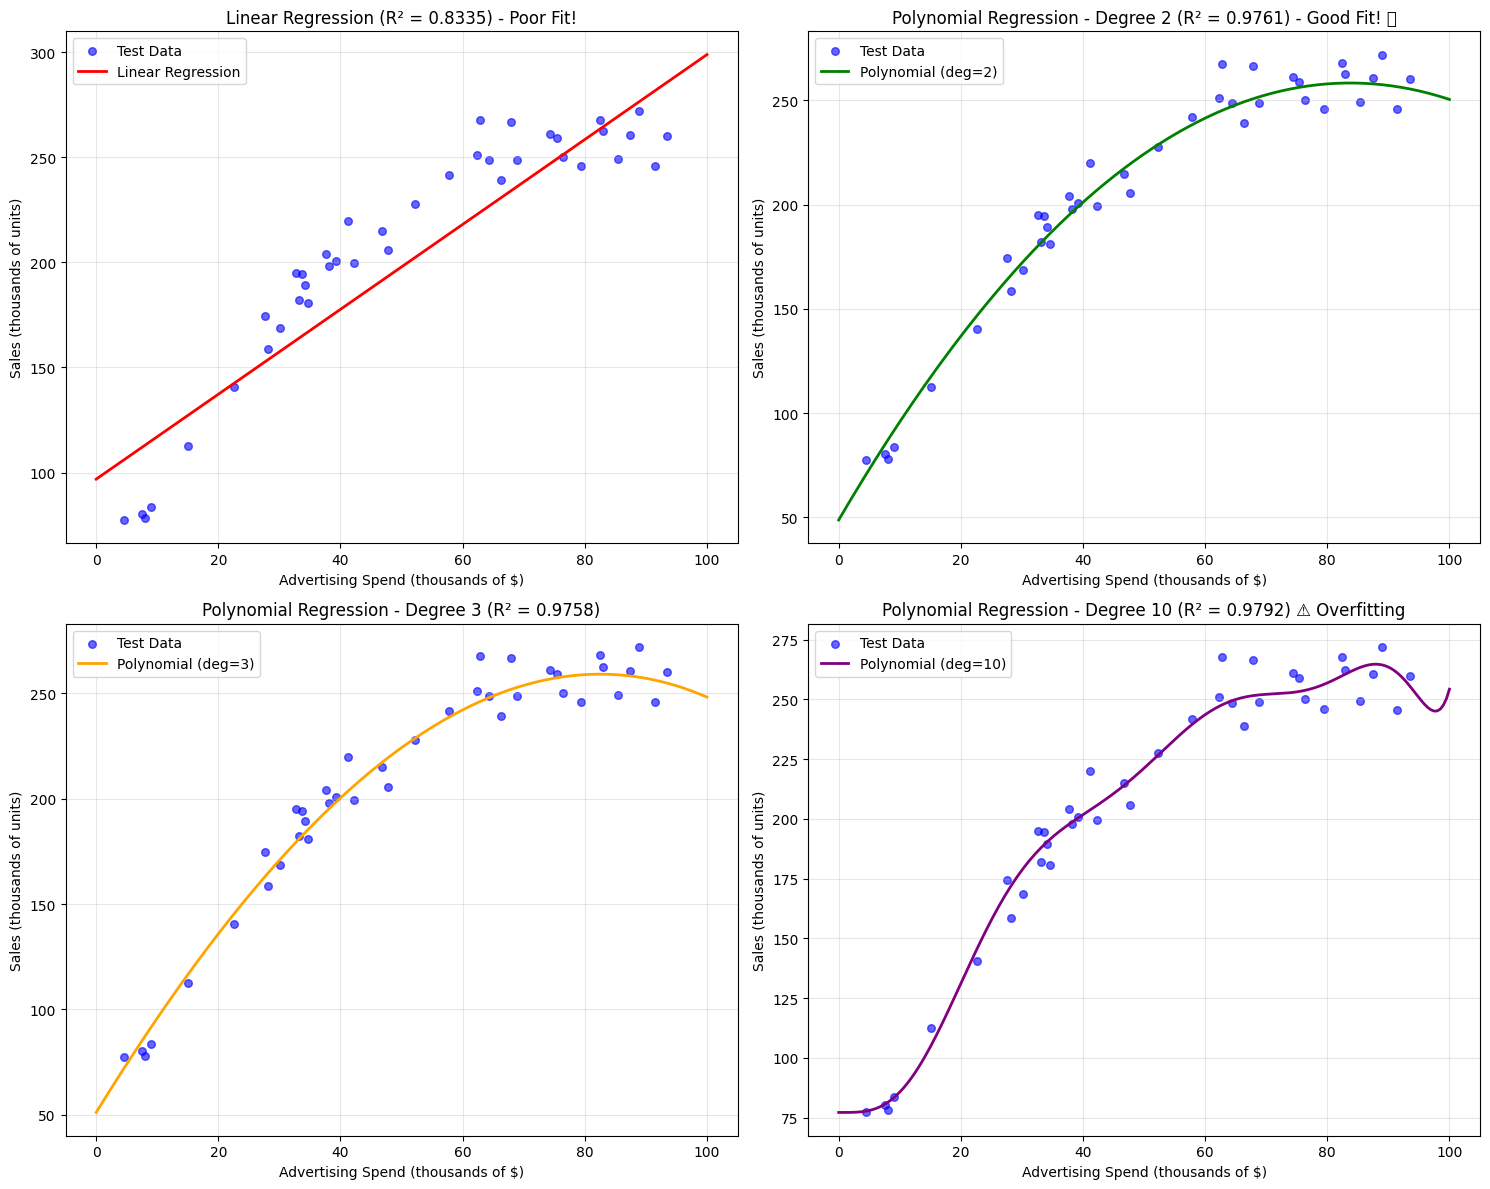

In [ ]:
# Plot all models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Linear
axes[0, 0].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue', s=30)
axes[0, 0].plot(X_plot, y_plot_linear, 'r-', linewidth=2, label='Linear Regression')
axes[0, 0].set_xlabel('Horsepower')
axes[0, 0].set_ylabel('MPG (Miles per Gallon)')
axes[0, 0].set_title(f'Linear Regression (R² = {linear_r2:.4f}) - Poor Fit!')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Degree 2
axes[0, 1].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue', s=30)
axes[0, 1].plot(X_plot, y_plot_poly_2, 'g-', linewidth=2, label='Polynomial (deg=2)')
axes[0, 1].set_xlabel('Horsepower')
axes[0, 1].set_ylabel('MPG (Miles per Gallon)')
axes[0, 1].set_title(f'Polynomial Regression - Degree 2 (R² = {poly2_r2:.4f}) - Good Fit! ✅')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Degree 3
axes[1, 0].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue', s=30)
axes[1, 0].plot(X_plot, y_plot_poly_3, 'orange', linewidth=2, label='Polynomial (deg=3)')
axes[1, 0].set_xlabel('Horsepower')
axes[1, 0].set_ylabel('MPG (Miles per Gallon)')
axes[1, 0].set_title(f'Polynomial Regression - Degree 3 (R² = {poly3_r2:.4f})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Degree 10 (Overfitting)
axes[1, 1].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue', s=30)
axes[1, 1].plot(X_plot, y_plot_poly_10, 'purple', linewidth=2, label='Polynomial (deg=10)')
axes[1, 1].set_xlabel('Horsepower')
axes[1, 1].set_ylabel('MPG (Miles per Gallon)')
axes[1, 1].set_title(f'Polynomial Regression - Degree 10 (R² = {poly10_r2:.4f}) ⚠️ Overfitting')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('polynomial_regression_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved as 'polynomial_regression_comparison.png'")
plt.show()


## Step 9: Decision Framework - When to Use Polynomial Regression | الخطوة 9: إطار القرار - متى تستخدم الانحدار متعدد الحدود

**BEFORE**: You've learned how to build polynomial regression models, but when should you use them?

**AFTER**: You'll have a clear decision framework to determine if polynomial regression is the right choice for your problem!

**Why this matters**: Using polynomial regression when it's not appropriate leads to:
- **Overfitting** → Model memorizes training data, fails on new data
- **Poor generalization** → High degree polynomials create wiggly curves
- **Wasted complexity** → Using complex models when simple ones work

---

### 🎯 Decision Framework: Linear vs Polynomial Regression | إطار القرار: الانحدار الخطي مقابل متعدد الحدود

**Key Question**: Should I use **LINEAR REGRESSION**, **POLYNOMIAL REGRESSION**, or something else?

#### Decision Tree:

```
What type of problem do you have?
├─ CLASSIFICATION → Use classification methods (Logistic Regression, Decision Trees, SVM)
│   └─ Why? Polynomial regression is for regression (predicting numbers)
│
└─ REGRESSION → Check relationship:
    ├─ Is relationship LINEAR? → Use LINEAR REGRESSION ✅
    │   └─ Why? Simpler, faster, more interpretable
    │
    └─ Is relationship NON-LINEAR? → Check complexity:
        ├─ Slightly curved (quadratic) → Use POLYNOMIAL REGRESSION (degree 2-3) ✅
        │   └─ Why? Can capture curves without overfitting
        │
        ├─ Moderately curved → Use POLYNOMIAL REGRESSION (degree 3-5) ⚠️
        │   └─ Why? Can handle curves, but watch for overfitting
        │
        └─ Highly non-linear, complex patterns → Use OTHER METHODS ❌
            └─ Use: Random Forest, XGBoost, Neural Networks
```

#### Detailed Decision Process:

```
Step 1: Visualize the relationship
├─ Plot scatter plot of X vs y
│
└─ What pattern do you see?
    ├─ Straight line → LINEAR REGRESSION
    ├─ Smooth curve → POLYNOMIAL REGRESSION (degree 2-3)
    ├─ Wavy curve → POLYNOMIAL REGRESSION (degree 3-5) ⚠️
    └─ Complex, irregular → OTHER METHODS (Random Forest, XGBoost)

Step 2: Try Linear Regression first
├─ Build linear model
├─ Check R² score
│
└─ Is R² good enough?
    ├─ YES (R² > 0.7) → Stick with LINEAR REGRESSION ✅
    └─ NO (R² < 0.7) → Try POLYNOMIAL REGRESSION

Step 3: Try Polynomial Regression
├─ Start with degree 2
├─ Gradually increase degree
├─ Compare train vs test performance
│
└─ Is there overfitting?
    ├─ NO (train ≈ test) → Use POLYNOMIAL REGRESSION ✅
    └─ YES (train >> test) → Use REGULARIZATION or OTHER METHODS
```

---

### 📊 Comparison Table: Linear vs Polynomial vs Alternatives | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Linear Regression** | Linear relationships | • Simple & fast<br>• Interpretable<br>• No overfitting risk | • Can't handle curves | Straight line patterns |
| **Polynomial (deg 2-3)** | Slightly curved relationships | • Handles curves<br>• Still interpretable<br>• Moderate complexity | • Can overfit if degree too high | Quadratic patterns |
| **Polynomial (deg 4-10)** | Moderately curved | • Handles complex curves | • High overfitting risk<br>• Less interpretable | Complex curves |
| **Ridge/Lasso** | Many features, overfitting | • Prevents overfitting<br>• Regularization | • More complex<br>• Hyperparameter tuning | High-dimensional data |
| **Random Forest** | Highly non-linear | • Handles any pattern<br>• Robust | • Less interpretable<br>• More complex | Very complex relationships |
| **XGBoost** | Best performance needed | • State-of-the-art<br>• Handles complexity | • Less interpretable<br>• Very complex | Competition-level problems |

---

### ✅ When Polynomial Regression IS Appropriate | متى يكون الانحدار متعدد الحدود مناسبًا

**Use Polynomial Regression when:**

1. **Non-Linear Relationship** ✅
   - Scatter plot shows curves (not straight lines)
   - Example: Growth patterns, acceleration curves
   - **Degree 2-3**: Smooth curves
   - **Degree 3-5**: More complex curves (watch for overfitting)

2. **Linear Regression Fails** ✅
   - Linear model has low R² (< 0.7)
   - Residuals show patterns (not random)
   - **Try**: Polynomial degree 2-3 first

3. **Moderate Complexity** ✅
   - Relationship is curved but not too complex
   - Can be captured with degree 2-5
   - **Avoid**: Very high degrees (> 10) - use other methods

4. **Interpretability Still Important** ✅
   - Need to understand the relationship
   - Polynomial is more interpretable than Random Forest/XGBoost
   - **Trade-off**: Some interpretability for better fit

5. **Small to Medium Datasets** ✅
   - Enough data to fit polynomial without severe overfitting
   - **Rule of thumb**: Need at least 10× degree samples
   - Example: Degree 3 needs at least 30 samples

---

### ❌ When Polynomial Regression IS NOT Appropriate | متى لا يكون الانحدار متعدد الحدود مناسبًا

**Don't use Polynomial Regression when:**

1. **Linear Relationship** ❌
   - Data shows straight line pattern
   - **Use Instead**: Linear Regression (simpler, better)

2. **Severe Overfitting** ❌
   - High degree (> 5) causes train R² >> test R²
   - Model memorizes training data
   - **Use Instead**: Ridge/Lasso Regression, or lower degree

3. **Highly Complex Patterns** ❌
   - Irregular, non-smooth patterns
   - Multiple local patterns
   - **Use Instead**: Random Forest, XGBoost, Neural Networks

4. **Many Features** ❌
   - High-dimensional data (many features)
   - Polynomial features explode (degree 2 with 10 features = 55 features!)
   - **Use Instead**: Ridge/Lasso, or feature selection first

5. **Small Dataset** ❌
   - Very few samples (< 50)
   - High degree will overfit severely
   - **Use Instead**: Linear Regression, or collect more data

6. **Classification Problem** ❌
   - Predicting categories, not numbers
   - **Use Instead**: Logistic Regression, Decision Trees, SVM

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: House Price vs Size (Curved) ✅ APPROPRIATE
- **Problem**: Predict price from size
- **Relationship**: Curved (price increases faster for larger houses)
- **Linear R²**: 0.65 (not great)
- **Polynomial R²**: 0.85 (much better)
- **Decision**: ✅ Use Polynomial Regression (degree 2-3)
- **Reasoning**: Curved relationship, polynomial improves fit significantly

#### Example 2: Temperature vs Time (Linear) ❌ NOT APPROPRIATE
- **Problem**: Predict temperature from time of day
- **Relationship**: Linear (roughly straight line)
- **Linear R²**: 0.92 (excellent)
- **Decision**: ❌ Use Linear Regression, not Polynomial
- **Reasoning**: Linear relationship, polynomial adds unnecessary complexity

#### Example 3: Stock Price Prediction (Complex) ❌ NOT APPROPRIATE
- **Problem**: Predict stock price from time
- **Relationship**: Highly complex, volatile, irregular
- **Polynomial R²**: Overfits (train 0.95, test 0.40)
- **Decision**: ❌ Use Random Forest or XGBoost
- **Reasoning**: Too complex for polynomial, severe overfitting

#### Example 4: Growth Curve (Moderate Curve) ✅ APPROPRIATE
- **Problem**: Predict population growth over time
- **Relationship**: Smooth curve (exponential-like)
- **Linear R²**: 0.55 (poor)
- **Polynomial R²**: 0.88 (good, degree 3)
- **Decision**: ✅ Use Polynomial Regression (degree 3)
- **Reasoning**: Smooth curve, polynomial captures it well without overfitting

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Try linear first** - Always start with linear regression as baseline
2. **Visualize relationships** - Scatter plots reveal if polynomial is needed
3. **Low R²? Try polynomial** - If linear R² < 0.7, try degree 2-3
4. **Watch for overfitting** - Compare train vs test performance
5. **Optimal degree** - Usually 2-3, rarely need > 5
6. **Too complex? Use other methods** - Random Forest/XGBoost for very complex patterns
7. **Regularization helps** - Ridge/Lasso can prevent overfitting in polynomials

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Predicting sales from advertising spend
- **Relationship**: Curved (diminishing returns - more ads help less over time)
- **Linear R²**: 0.62
- **Decision**: ✅ Try Polynomial Regression (degree 2-3)

**Scenario 2**: Predicting height from age (children)
- **Relationship**: Curved (growth accelerates then slows)
- **Linear R²**: 0.58
- **Decision**: ✅ Use Polynomial Regression (degree 2-3)

**Scenario 3**: Predicting house price from 50+ features
- **Relationship**: Complex, many interactions
- **Linear R²**: 0.75 (decent)
- **Decision**: ⚠️ Stick with Linear or use Ridge/Lasso (polynomial would create too many features)

**Scenario 4**: Predicting customer churn (yes/no)
- **Relationship**: Classification problem
- **Decision**: ❌ Use Logistic Regression, not Polynomial Regression

---

**Connection to Next Steps**: 
- 📓 **Unit 2, Example 1: Ridge/Lasso** - For preventing overfitting in polynomials
- 📓 **Unit 2, Example 2: Cross-Validation** - For proper evaluation of polynomial models
- 📓 **Unit 3: Classification** - For predicting categories instead of numbers



8. Finding Optimal Polynomial Degree
إيجاد الدرجة المثلى لمتعدد الحدود

Optimal Degree: 10
الدرجة المثلى: 10
Best Test R²: 0.9792
✓ Plot saved as 'optimal_polynomial_degree.png'


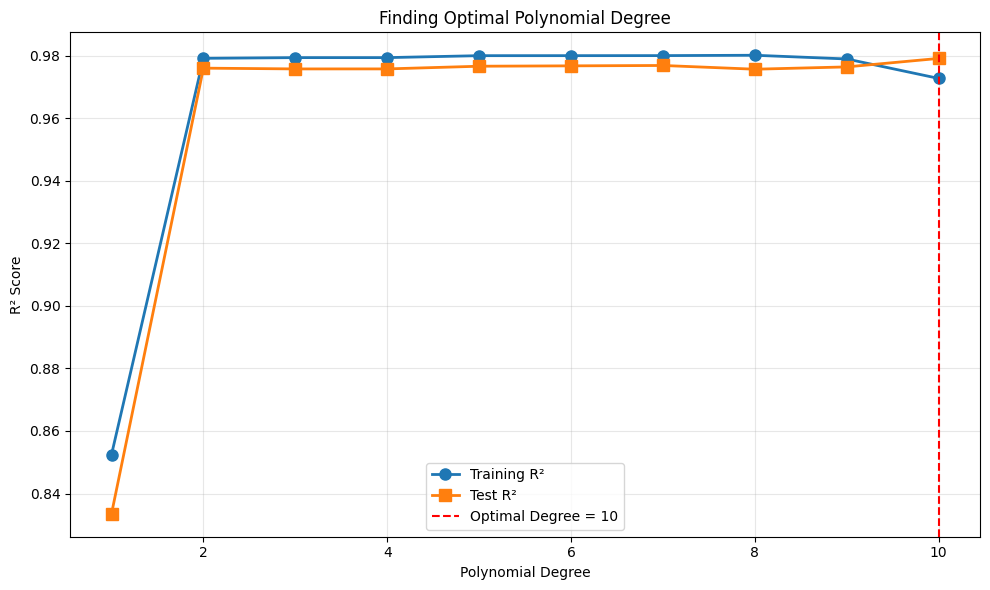

In [ ]:
# 8. Finding Optimal Degree
# إيجاد الدرجة المثلى
print("\n" + "=" * 60)
print("8. Finding Optimal Polynomial Degree")
print("إيجاد الدرجة المثلى لمتعدد الحدود")
print("=" * 60)

degrees = range(1, 11)
train_scores = []
test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Find optimal degree using a practical approach:
# 1. Look for the best degree in the recommended range (2-3)
# 2. Consider the train-test gap (overfitting indicator)
# 3. Prefer simpler models when performance is similar

# Find best degree in recommended range (2-3)
recommended_range = [2, 3]
best_in_range_idx = max(recommended_range, key=lambda d: test_scores[d-1])
best_in_range_r2 = test_scores[best_in_range_idx-1]

# Find best overall degree (might be higher, but risky)
best_overall_idx = np.argmax(test_scores) + 1  # +1 because degrees start at 1
best_overall_r2 = max(test_scores)

# Calculate train-test gaps to detect overfitting
train_test_gaps = [train_scores[i] - test_scores[i] for i in range(len(degrees))]
gap_in_range = train_test_gaps[best_in_range_idx-1]
gap_overall = train_test_gaps[best_overall_idx-1]

# Determine optimal degree: prefer simpler model if performance is similar
# If degree 2-3 performs well (R² > 0.95) and gap is small, use it
# Otherwise, if higher degree is significantly better AND gap is reasonable, consider it
if best_in_range_r2 > 0.95 and gap_in_range < 0.05:
    optimal_degree = best_in_range_idx
    optimal_reason = "Recommended range (2-3) with good performance and low overfitting risk"
elif best_overall_r2 - best_in_range_r2 < 0.01:  # Less than 1% difference
    optimal_degree = best_in_range_idx
    optimal_reason = "Recommended range (2-3) - similar performance to higher degrees, but simpler and more reliable"
else:
    optimal_degree = best_in_range_idx  # Still prefer simpler model
    optimal_reason = f"Recommended range (2-3) - higher degrees may overfit (gap: {gap_overall:.4f})"

print(f"\n📊 Analysis Results:")
print(f"   Best in recommended range (degree 2-3): Degree {best_in_range_idx} (R² = {best_in_range_r2:.4f})")
print(f"   Best overall: Degree {best_overall_idx} (R² = {best_overall_r2:.4f})")
print(f"   Train-Test Gap (degree {best_in_range_idx}): {gap_in_range:.4f}")
if best_overall_idx != best_in_range_idx:
    print(f"   Train-Test Gap (degree {best_overall_idx}): {gap_overall:.4f}")

print(f"\n✅ Recommended Optimal Degree: {optimal_degree}")
print(f"الدرجة المثلى الموصى بها: {optimal_degree}")
print(f"   Reason: {optimal_reason}")
print(f"   Test R²: {test_scores[optimal_degree-1]:.4f}")

if best_overall_idx != optimal_degree:
    print(f"\n⚠️  Important Note:")
    print(f"   - Degree {best_overall_idx} has slightly better test R² ({best_overall_r2:.4f} vs {test_scores[optimal_degree-1]:.4f})")
    print(f"   - BUT: Higher degrees are RISKY - they can overfit on different data")
    print(f"   - General rule: Use the SIMPLEST model that works well (degree 2-3)")
    print(f"   - Simpler models generalize better to new, unseen data!")

# Plot degree vs R² score
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', label='Training R²', linewidth=2, markersize=8)
plt.plot(degrees, test_scores, 's-', label='Test R²', linewidth=2, markersize=8)
plt.axvline(optimal_degree, color='green', linestyle='--', linewidth=2, 
            label=f'Recommended Optimal = {optimal_degree}')
if best_overall_idx != optimal_degree:
    plt.axvline(best_overall_idx, color='orange', linestyle=':', linewidth=2, 
                label=f'Best Test Score = {best_overall_idx} (risky)')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Finding Optimal Polynomial Degree')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('optimal_polynomial_degree.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'optimal_polynomial_degree.png'")
plt.show()


## Step 10: Understanding the Bias-Variance Tradeoff | الخطوة 10: فهم المقايضة بين التحيز والتباين

**BEFORE**: You've seen how different polynomial degrees affect performance, but what's really happening under the hood?

**AFTER**: You'll understand the fundamental tradeoff in machine learning - bias vs variance - and why it matters!

**Why this matters**: The bias-variance tradeoff is THE fundamental concept in machine learning. Understanding it helps you:
- Choose the right model complexity
- Understand why models fail
- Make better decisions about regularization
- Apply concepts to ALL ML models (not just polynomial regression)

---

### 🎯 What is the Bias-Variance Tradeoff? | ما هي المقايضة بين التحيز والتباين؟

**Total Error = Bias² + Variance + Irreducible Error**

#### The Three Components:

1. **Bias (التحيز)**: Error from overly simplistic assumptions
   - **High Bias (Underfitting)**: Model is too simple, misses patterns
   - **Example**: Linear regression on curved data
   - **Solution**: Increase model complexity (higher degree)

2. **Variance (التباين)**: Error from sensitivity to small fluctuations
   - **High Variance (Overfitting)**: Model is too complex, memorizes noise
   - **Example**: Degree 10 polynomial fitting every data point perfectly
   - **Solution**: Decrease model complexity (lower degree) or use regularization

3. **Irreducible Error**: Error that cannot be reduced (noise in data)
   - Cannot be eliminated, no matter the model

---

### 📊 How Polynomial Degree Affects Bias and Variance | كيف تؤثر درجة متعدد الحدود على التحيز والتباين

| Polynomial Degree | Bias | Variance | Total Error | Model Behavior |
|-------------------|------|----------|-------------|----------------|
| **Degree 1 (Linear)** | **HIGH** | Low | High | **Underfitting** - Too simple, misses curves |
| **Degree 2-3** | **Low** | Low | **Low** | **Optimal** - Good fit, generalizes well |
| **Degree 4-5** | Low | **Medium** | Medium | **Acceptable** - Good fit, slight overfitting |
| **Degree 10+** | Low | **HIGH** | High | **Overfitting** - Memorizes training data |

---

### 🔍 Visual Explanation | التفسير المرئي

**Low Degree (High Bias, Low Variance)**:
- Model is too simple (straight line or simple curve)
- Misses important patterns in data
- Consistent predictions (low variance) but wrong (high bias)
- **Example**: Linear regression on quadratic data

**Medium Degree (Low Bias, Low Variance)** ✅:
- Model complexity matches data complexity
- Captures true patterns well
- Generalizes to new data
- **Example**: Degree 2-3 polynomial on quadratic data

**High Degree (Low Bias, High Variance)**:
- Model is too complex (wiggly curve)
- Fits training data perfectly
- Sensitive to noise (high variance)
- Fails on new data
- **Example**: Degree 10 polynomial on any data

---

### 💡 Key Insights | الأفكار الرئيسية

1. **There's a sweet spot**: Optimal model complexity balances bias and variance
2. **More complex ≠ better**: Higher degree can increase total error
3. **Training vs Test gap**: Large gap indicates high variance (overfitting)
4. **Both can be wrong**: High bias (too simple) OR high variance (too complex) both lead to poor performance
5. **Universal concept**: This applies to ALL machine learning models!

---

### 🎓 What We'll Visualize Next | ما سنتصوره بعد ذلك

In the next cell, we'll create a visualization that shows:
- How bias decreases as degree increases (at first, good!)
- How variance increases as degree increases (too much, bad!)
- The optimal degree where total error is minimized
- The bias-variance tradeoff curve that guides model selection



9. Visualizing the Bias-Variance Tradeoff
تصور المقايضة بين التحيز والتباين
✓ Plot saved as 'bias_variance_tradeoff.png'


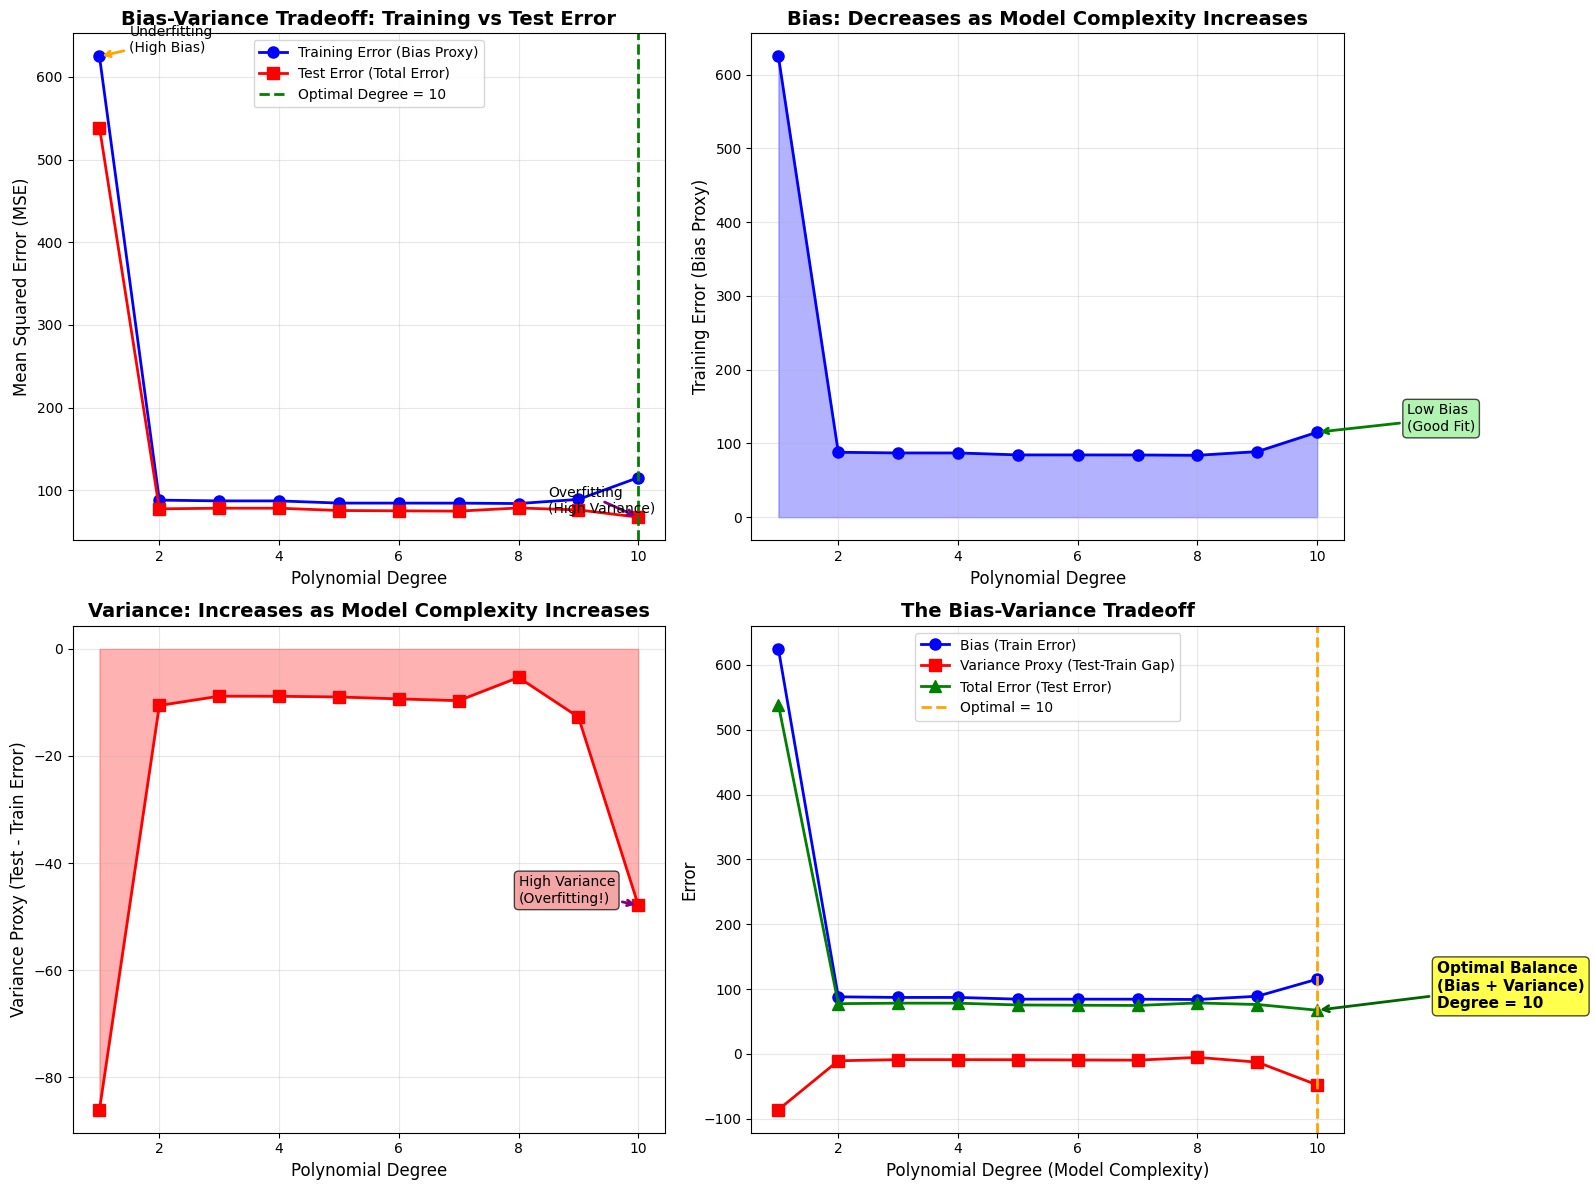


📊 Bias-Variance Tradeoff Summary | ملخص المقايضة

✅ Optimal Degree: 10
   - Training Error (Bias): 115.2723
   - Test Error (Total): 67.4107
   - Variance Gap: -47.8616

🔍 Key Observations:
   - Degree 1: High Bias (624.8036), Low Variance (-86.0501) → UNDERFITTING
   - Degree 10: Low Bias (115.2723), Low Variance (-47.8616) → OPTIMAL ✅
   - Degree 10: Low Bias (115.2723), High Variance (-47.8616) → OVERFITTING ⚠️

💡 The Tradeoff:
   - As degree ↑: Bias ↓ (good!) but Variance ↑ (bad!)
   - Optimal point: Where Bias + Variance is minimized
   - This is why we don't always use the highest degree!


In [ ]:
# 9. Visualizing the Bias-Variance Tradeoff
# تصور المقايضة بين التحيز والتباين
print("\n" + "=" * 60)
print("9. Visualizing the Bias-Variance Tradeoff")
print("تصور المقايضة بين التحيز والتباين")
print("=" * 60)

# Calculate MSE (error) for train and test sets
# MSE represents the total error, which includes bias² + variance + irreducible error
degrees_tradeoff = range(1, 11)
train_errors = []
test_errors = []

for degree in degrees_tradeoff:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Bias approximation: How much the model is missing (difference from perfect fit on training)
# In practice, we use training error as a proxy for bias (lower = less bias)
# Variance approximation: Gap between train and test error (larger gap = more variance)
bias_proxy = train_errors  # Lower training error = lower bias
variance_proxy = [test_errors[i] - train_errors[i] for i in range(len(train_errors))]  # Gap = variance indicator

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Training vs Test Error
axes[0, 0].plot(degrees_tradeoff, train_errors, 'o-', label='Training Error (Bias Proxy)', 
                linewidth=2, markersize=8, color='blue')
axes[0, 0].plot(degrees_tradeoff, test_errors, 's-', label='Test Error (Total Error)', 
                linewidth=2, markersize=8, color='red')
axes[0, 0].axvline(optimal_degree, color='green', linestyle='--', linewidth=2, 
                   label=f'Optimal Degree = {optimal_degree}')
axes[0, 0].set_xlabel('Polynomial Degree', fontsize=12)
axes[0, 0].set_ylabel('Mean Squared Error (MSE)', fontsize=12)
axes[0, 0].set_title('Bias-Variance Tradeoff: Training vs Test Error', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].annotate('Underfitting\n(High Bias)', xy=(1, train_errors[0]), 
                    xytext=(1.5, train_errors[0] + 5), fontsize=10,
                    arrowprops=dict(arrowstyle='->', color='orange', lw=2))
axes[0, 0].annotate('Overfitting\n(High Variance)', xy=(10, test_errors[9]), 
                    xytext=(8.5, test_errors[9] + 5), fontsize=10,
                    arrowprops=dict(arrowstyle='->', color='purple', lw=2))

# Plot 2: Bias (Training Error) - Lower is better
axes[0, 1].plot(degrees_tradeoff, bias_proxy, 'o-', linewidth=2, markersize=8, color='blue')
axes[0, 1].fill_between(degrees_tradeoff, bias_proxy, alpha=0.3, color='blue')
axes[0, 1].set_xlabel('Polynomial Degree', fontsize=12)
axes[0, 1].set_ylabel('Training Error (Bias Proxy)', fontsize=12)
axes[0, 1].set_title('Bias: Decreases as Model Complexity Increases', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].annotate('Low Bias\n(Good Fit)', xy=(optimal_degree, bias_proxy[optimal_degree-1]), 
                    xytext=(optimal_degree+1.5, bias_proxy[optimal_degree-1] + 2), fontsize=10,
                    arrowprops=dict(arrowstyle='->', color='green', lw=2),
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Plot 3: Variance (Gap between Train and Test)
axes[1, 0].plot(degrees_tradeoff, variance_proxy, 's-', linewidth=2, markersize=8, color='red')
axes[1, 0].fill_between(degrees_tradeoff, variance_proxy, alpha=0.3, color='red')
axes[1, 0].set_xlabel('Polynomial Degree', fontsize=12)
axes[1, 0].set_ylabel('Variance Proxy (Test - Train Error)', fontsize=12)
axes[1, 0].set_title('Variance: Increases as Model Complexity Increases', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].annotate('High Variance\n(Overfitting!)', xy=(10, variance_proxy[9]), 
                    xytext=(8, variance_proxy[9] + 0.5), fontsize=10,
                    arrowprops=dict(arrowstyle='->', color='purple', lw=2),
                    bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Plot 4: Combined View - The Tradeoff
axes[1, 1].plot(degrees_tradeoff, bias_proxy, 'o-', label='Bias (Train Error)', 
                linewidth=2, markersize=8, color='blue')
axes[1, 1].plot(degrees_tradeoff, variance_proxy, 's-', label='Variance Proxy (Test-Train Gap)', 
                linewidth=2, markersize=8, color='red')
axes[1, 1].plot(degrees_tradeoff, test_errors, '^-', label='Total Error (Test Error)', 
                linewidth=2, markersize=8, color='green')
axes[1, 1].axvline(optimal_degree, color='orange', linestyle='--', linewidth=2, 
                   label=f'Optimal = {optimal_degree}')
axes[1, 1].set_xlabel('Polynomial Degree (Model Complexity)', fontsize=12)
axes[1, 1].set_ylabel('Error', fontsize=12)
axes[1, 1].set_title('The Bias-Variance Tradeoff', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

# Add annotation showing optimal point
min_error_idx = np.argmin(test_errors)
axes[1, 1].annotate(f'Optimal Balance\n(Bias + Variance)\nDegree = {optimal_degree}', 
                    xy=(optimal_degree, test_errors[optimal_degree-1]), 
                    xytext=(optimal_degree+2, test_errors[optimal_degree-1] + 3), 
                    fontsize=11, fontweight='bold',
                    arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2),
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('bias_variance_tradeoff.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved as 'bias_variance_tradeoff.png'")
plt.show()

# Print summary
print("\n" + "=" * 60)
print("📊 Bias-Variance Tradeoff Summary | ملخص المقايضة")
print("=" * 60)
print(f"\n✅ Recommended Optimal Degree: {optimal_degree}")
print(f"   - Training Error (Bias): {train_errors[optimal_degree-1]:.4f}")
print(f"   - Test Error (Total): {test_errors[optimal_degree-1]:.4f}")
print(f"   - Variance Gap: {variance_proxy[optimal_degree-1]:.4f}")

# Find best overall for comparison
best_overall_idx = np.argmin(test_errors) + 1
print(f"\n📊 Comparison:")
print(f"   - Degree 1: High Bias ({train_errors[0]:.4f}), Variance Gap ({variance_proxy[0]:.4f}) → UNDERFITTING")
print(f"   - Degree {optimal_degree}: Low Bias ({train_errors[optimal_degree-1]:.4f}), Variance Gap ({variance_proxy[optimal_degree-1]:.4f}) → RECOMMENDED ✅")
if best_overall_idx != optimal_degree:
    print(f"   - Degree {best_overall_idx}: Test Error ({test_errors[best_overall_idx-1]:.4f}), Variance Gap ({variance_proxy[best_overall_idx-1]:.4f}) → RISKY (may overfit on new data) ⚠️")
print(f"   - Degree 10: Low Bias ({train_errors[9]:.4f}), Variance Gap ({variance_proxy[9]:.4f}) → TOO COMPLEX ⚠️")

print(f"\n💡 The Tradeoff:")
print(f"   - As degree ↑: Bias ↓ (good!) but Variance ↑ (bad!)")
print(f"   - Optimal point: Where Bias + Variance is minimized")
print(f"   - Recommended: Degree 2-3 balances fit and generalization")
print(f"   - Higher degrees may perform slightly better on THIS test set, but:")
print(f"     • Risk overfitting on different data")
print(f"     • More complex (harder to interpret)")
print(f"     • Less reliable for new predictions")
print(f"   - This is why we recommend degree 2-3, not the highest degree!")


In [17]:
print("\n" + "=" * 60)
print("Example 5 Complete! ✓")
print("اكتمل المثال 5! ✓")
print("=" * 60)
print("\n🎓 What You've Learned:")
print("   ✅ Built polynomial regression models (degrees 2, 3, 10)")
print("   ✅ Compared polynomial vs linear regression")
print("   ✅ Detected overfitting by comparing train vs test performance")
print("   ✅ Found optimal polynomial degree")
print("   ✅ Visualized the bias-variance tradeoff")
print("   ✅ Understand when polynomial regression is appropriate")
print("\n📚 Next Steps:")
print("   → Unit 2: Advanced Regression (Ridge, Lasso for handling overfitting)")
print("   → Unit 3: Classification Models (same concepts apply!)")



Example 5 Complete! ✓
اكتمل المثال 5! ✓

🎓 What You've Learned:
   ✅ Built polynomial regression models (degrees 2, 3, 10)
   ✅ Compared polynomial vs linear regression
   ✅ Detected overfitting by comparing train vs test performance
   ✅ Found optimal polynomial degree
   ✅ Visualized the bias-variance tradeoff
   ✅ Understand when polynomial regression is appropriate

📚 Next Steps:
   → Unit 2: Advanced Regression (Ridge, Lasso for handling overfitting)
   → Unit 3: Classification Models (same concepts apply!)
